In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
import collections
import numpy as np
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from sklearn.decomposition import PCA
import spacy
nlp = spacy.load('en_core_web_sm')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from gensim import corpora, models, matutils

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/matthew.redmond@usfoods.com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
df = pd.read_csv("Onion_NYT.csv")

In [5]:
df.dtypes

Onion              int64
Title             object
Published Time    object
Content           object
dtype: object

In [9]:
df['Title'] = df['Title'].astype(str)

In [3]:
df.head

<bound method NDFrame.head of        Onion                                              Title  \
0          0  Misogyny Fuels Violence Against Women. Should ...   
1          0                            ‘No Time to Be a Child’   
2          0  His, Hers, Everyone’s: Gender-Equal Underwear ...   
3          0  A Fashion Show With an Unexpected Focus: Sexua...   
4          0                        Hey, Alexa, Are You Sexist?   
...      ...                                                ...   
43456      0  Swiss Voters Reject Proposal to Ban Synthetic ...   
43457      0  Swiss Voters Approve Law Allowing Same-Sex Mar...   
43458      0      A Nazi Legacy Haunts a Museum’s New Galleries   
43459      1  Chemists Announce Upgraded Periodic Table With...   
43460      1  Hard To Tell If Wikipedia Entry On Dada Has Be...   

                  Published Time  \
0      2021-03-26 00:31:15+00:00   
1      2021-09-25 18:58:22+00:00   
2      2021-06-25 21:18:24+00:00   
3      2021-09-12 19:

In [10]:
df['spacy_Title'] = list(nlp.pipe(df['Title']))

In [13]:
df.head

<bound method NDFrame.head of        Onion                                              Title  \
0          0  Misogyny Fuels Violence Against Women. Should ...   
1          0                            ‘No Time to Be a Child’   
2          0  His, Hers, Everyone’s: Gender-Equal Underwear ...   
3          0  A Fashion Show With an Unexpected Focus: Sexua...   
4          0                        Hey, Alexa, Are You Sexist?   
...      ...                                                ...   
43456      0  Swiss Voters Reject Proposal to Ban Synthetic ...   
43457      0  Swiss Voters Approve Law Allowing Same-Sex Mar...   
43458      0      A Nazi Legacy Haunts a Museum’s New Galleries   
43459      1  Chemists Announce Upgraded Periodic Table With...   
43460      1  Hard To Tell If Wikipedia Entry On Dada Has Be...   

                  Published Time  \
0      2021-03-26 00:31:15+00:00   
1      2021-09-25 18:58:22+00:00   
2      2021-06-25 21:18:24+00:00   
3      2021-09-12 19:

In [14]:
spstopwords = nlp.Defaults.stop_words

In [15]:
#https://stackoverflow.com/questions/55817040/removing-stop-words-using-spacy
df['Spacy_Title2'] = df.Title.apply(lambda text: 
                                          " ".join(token.lemma_ for token in nlp(text) 
                                                   if not token.is_stop))

In [16]:
df.head


<bound method NDFrame.head of        Onion                                              Title  \
0          0  Misogyny Fuels Violence Against Women. Should ...   
1          0                            ‘No Time to Be a Child’   
2          0  His, Hers, Everyone’s: Gender-Equal Underwear ...   
3          0  A Fashion Show With an Unexpected Focus: Sexua...   
4          0                        Hey, Alexa, Are You Sexist?   
...      ...                                                ...   
43456      0  Swiss Voters Reject Proposal to Ban Synthetic ...   
43457      0  Swiss Voters Approve Law Allowing Same-Sex Mar...   
43458      0      A Nazi Legacy Haunts a Museum’s New Galleries   
43459      1  Chemists Announce Upgraded Periodic Table With...   
43460      1  Hard To Tell If Wikipedia Entry On Dada Has Be...   

                  Published Time  \
0      2021-03-26 00:31:15+00:00   
1      2021-09-25 18:58:22+00:00   
2      2021-06-25 21:18:24+00:00   
3      2021-09-12 19:

In [19]:
listforcv = []
for doc in df.Spacy_Title2:
    listforcv.append(doc)
    print(doc)
    

Misogyny Fuels Violence Women . Hate Crime ?
' time child '
, , : Gender - Equal Underwear go ( slightly ) mainstream
Fashion Unexpected Focus : Sexual Assault survivor
hey , Alexa , sexist ?
run Office easy . try enter Race Orthodox Woman .
time talk ' hard thing '
hiring , Firing , set Culture : Black Women TV News
' tragic ' : Ma’Khia Bryant Burden Black Girlhood
Biden Stimulus Package help reverse ' shecession ' ?
Newest Champions Caregiver Reform ? private Sector .
tv Movies finally celebrate old woman
App know got period . guess tell ?
tell woman join Ambulance Corps . start .
see Children tv show . create .
lack access Pads Tampons . lawmaker ?
return Office ? Women Color ready
' ' reach limit . Parents , Time Reset .
New Pregnancy Discrimination Bill House . time pass .
key Equitable Recovery : Better Data ' Trusted messenger '
Modern Medicine keep Overlooking Menopause
year , Western Scientists stigmatize Periods . live Consequences .
woman remake workplace well Suit life
' pr

N.C.A.A. fine U.S.C. Men Basketball Bribery case
Cold right ?
redistricting process begin , advocate push state L.G.B.T.Q. community mind .
say Black Teen stole phone . face Robbery Assault Charges .
eviction freeze Set Lapse Biden Housing Aid Effort Lags
U.S. Navy combat ship strand Guantánamo Bay virus outbreak .
FINAL : Buccaneers beat Chiefs , Tom Brady champion .
doctor Grandchildren 5 Fatally Shot South Carolina
Nevada man charge theft 500 blank vaccine card Los Angeles .
Race ' report card ' measure Music Industry change
anti - n.r.a. ad campaign focus group member .
international brand sign new accord protect garment worker Bangladesh .
new drug drive insurance price earn billion Medicare .
week Covid news : global inequity vaccine dose ; travel advice C.D.C. ; Cuomo book .
virus campus , test border , new study suggest .
million U.S. aid benefit rich hospital , new study show .
new bill force philanthropy spend money fast .
' Nutcracker ' return , company rethink Depictions As

Amanda Gorman say Security Guard confront , say look ' suspicious '
Irene Aldana get statement win .
friend adult
Man hate position think , feel , act
frustrated Gunman believe far drive find Nearest Planned Parenthood Clinic
Police finally Breakthrough Decades - Old Marijuana Possession Cold Case
Texas Sheriff crack Chicken - - Chicken violence
Crossword Stumper
Pfizer Researchers discover New Stimulating , Medicating , Captivating Cure ail
Amazon agree $ 62 million settlement withhold tip delivery driver .
current Amazon Employee ?
Amazon unionization vote break .
Amazon strike deal Affirm , buy - pay - later provider .
Amazon say new F.T.C. chair , Lina Khan , recuse investigation .
' mercy '
Amazon Big year , Paid Tax Luxembourg
Amazon agree pay $ 500,000 California claim hide Covid-19 case worker .
Flagging Amazon Games Unit , New World ' breakthrough '
Amazon raise Minimum Wage , Local Companies Follow suit
Amazon investigate gender bias claim cloud division .
Amazon settle activ

tiny Love Stories : ' stop '
write Illness platitude
Justice Smith need assumption
Tavi Gevinson find Comfort Legal Pads , canned Fish rumi
$ 630,000 home Oregon , Maine New Mexico
Yankees ' Shutdown emphasize Staying Power Coronavirus
janitor colleague Fast Track Retirement
Camps kid Safe summer ?
Covid Forces Families rethink Nursing Home care
trap Basements Cars , lose life Savage storm
World ' slice ' art
Roadblock Iran President - Elect : U.S. Sanctions List
Street Vendor Permit . Produce toss Trash .
rift art Activism Ripples performance world
break barrier : Life Lee Elder
oil executive grill Industry role Climate Disinformation
Media Detour , AT&T Confronts Old Problems
Kamala Harris : 9/11 show ' fear sow division . '
Rare Black - own Art Gallery Lands Chelsea
New York City want bring park Park Avenue .
Year Wuhan , China tell Tale Triumph ( Mistakes )
Blazers ’ Billups Hire draw attention Sexual Assault Accusation
VP Meyer Shocked hear Chinese International Space Prison
Super

tv week : ' Judas Black Messiah ' Shark Week
tv week : ' Celebrity Dating Game ' Father Day Special
tv week : ' People vs. Agent Orange ' Macy firework
tv week : ' blindspotting ' ' Betty '
tv week : ' soul nation ' ' ghostbuster '
tv week : ' Tinker , Tailor , Soldier , Spy ' ' genius : Aretha '
tv week : ' Coded Bias ' ' Tina '
tv week : ' extinction    Facts ' ' hysterical '
tv week : ' come America ' Grammy Awards
tv week : ' 144 ' ' Pride '
tv week : ' treatment ' ' inside Met '
tv week : ' Oslo ' Specials Honoring George Floyd
tv week : ' Amy tan    Unintended Memoir ' ' Vax live '
tv week : Kennedy Center Honors remember Tulsa Massacre
tv week : ' Oratorio ' ' Dexter : New Blood '
tv week : ' simple Water ' American Music Awards
tv week : ' dance Stars ' Soul Train award
tv week : Willy Wonka ' West Story ' special
tv week : documentary Kevin Garnett Jake Burton Carpenter
tv week : ' Home Sweet home ' ' succession '
tv week : ' curb enthusiasm ' ' Queens '
tv week : ' Great Perf

Major Gaffe , Obama forget dumb
God Legally change Jake Steele
Complete Idiot think Brittany Murphy Dating Jeff Kwatinetz
Nonindigenous Larry Crosses State line
new , improve Olean 30 percent likely shit pant
Bounty Unveils New Ultra - thin Paper towel natural feeling Wiping spill
Jilted Lover Keying Cheater car realize start
employee Leaves Performance Review Clear , identifiable goal surrender Void
Pringles Level inch fall
dreamwork SKG Signs J&H production - Year Deal
skip Friend Birthday Party Minute Closest Woman come feel Rush heroin
Pantene Releases New Complicated 1 - in-2 shampoo
Tide introduce new ink Pen create stain
Dildo Manufacturers Association : nation return Normalcy , Purchase dildo
Febreze Releases New Air Horn cover Unpleasant Bathroom sound
Olay introduce New Line pre - moisturized skin
Mezcal Brooklyn Connections
U.S. Soccer Ties World Cup Prize Money equal pay Fight
lockdown ease , Regal Cinemas reopen month .
Antarctic signal Major Climate Disruption
Giant blood

Weekly Accessible Learning Activities : Double Dutch , Emojis , Gratitude
Weekly Accessible Learning Activities : Chance Encounters , Quitting Shower bus
accessible reading writing Activities : Park Rangers , School Shortages Life Passions
Band Camp , Childhood Memories Multimedia contest
Sunday Routines , Highway Lines , Unplugging
Weekly Accessible Learning Activities : Screen Time Flying car
Weekly Accessible Learning Activities : analyze Photo , write Story , Reflect community
Weekly Accessible Learning Activities : Manatees , Covid Dreams Pinball
home sell $ 1.5 million
home sell $ 1 million
home sell $ 750,000
home sell $ 650,000
home sell $ 450,000
home sell $ 1.3 million
home sell $ 1 million
home sell $ 750,000
home sell $ 600,000
home sell $ 450,000
home sell $ 1.5 million
home sell $ 1 million
home sell $ 750,000
home sell $ 600,000
home sell $ 440,000
home sell $ 1.5 million
home sell $ 1 million
home sell $ 750,000
home sell $ 600,000
home sell $ 500,000
home sell $ 1.5 mi

Amtrak Worker Sold Railroad Equipment year line pocket , U.S. say
change Classical Music
' Guernica ' Tapestry take U.N. Rockefeller
Police Forces long try weed extremist Ranks . come Capitol Riot .
Jewelry line inspire Design Family heirloom
muse . boss .
Environmental Watchdog Hudson River spend Sundays
Mobile Home Owners fear Evictions Pandemic Protections end
Mother Murder Conviction dismiss ' 91 death 5 - year - Old Son
Elijah Wood ' Lord Rings ' 20 Frodo fan forever
Dogs 9/11 : Failed Searches life help sustain
Address , ID , struggle Stimulus check
Places New York City Republicans stand chance
light Flickered New York City . Subways Grind halt ?
Acrylic Nails Fine Art Treatment
dance New York Summer Joy Grief
Harlem Hellfighters War Heroes . come Home Racism .
Excessive Drinking Rose Pandemic . way cut .
Migraine Sufferers want eat fish
Black Bard South , Randall Kenan topple Monuments
Indian Point shut . mean Fossil Fuel .
Jeff Bezos Renews Focus Blue Origin , slow Launch
work 

F.B.I. Agents C.I.A. Operatives Secret Overseas Prisons
proceeding 9/11 Case Resume , delay
Guantánamo Bay : prison
defense Lawyers Block Force - Feeding Guantánamo Prisoner
Sept. 11 Trial secret secret anymore
Guantánamo Detainees charge 2002 Bali Bombing
charge Bali Bombing Case delay Guantánamo
CIA Interrogator Apologizes profusely ask question Touchy Subject
Khalid Sheikh Mohammed Confesses confess torture
Guantanamo Bay begin construction Senior Care wing
terrorist Group step Venezuela Lawlessness grow
Guatemala , Harris tell Undocumented stay away U.S. Border
Guatemala Investigates Claim Bribe pay president
Fashion Hacking Future ? Gucci say yes .
Police Chief Wyoming ranchland lose War drug
N.F.L. Week 4 prediction : pick Spread
N.Y.C. double ' cleanup ' homeless encampment year , despite C.D.C. guidance let .
Demon Kicking self Inhabiting child Possessed buy Gun
' spark lit ' : cuban dissident feel embolden despite Crackdown
Guinea Declares Ebola Outbreak 3 death
censorship , S

Coronavirus Briefing : happen today
Germany end salary subsidy unvaccinated worker quarantine .
Daniel Lee leave Bottega veneta
Education Department wipe $ 1.1 billion debt ITT student .
Scorpion tail Bend Twist
politic determine stove use
12 year , $ 800 million , conviction : Lebanon Tribunal wind Short Answers
Congress investigate McKinsey role Opioid Crisis
Oscar Race hard predict
N.C.A.A. Women basketball : need know
Biden call ' common purpose ' National Prayer Breakfast .
expect 2021 Oscar Nominations
worker Gain pay Leverage , Nonprofits
matter Heart Precede Love Marriage Florida
stinky strip paper , theory , help drive virus transmission .
Smell Test Screen People Covid ?
6 podcast Pet owner
poem : postlude
F.D.A. Advisers Resign Agency Approval Alzheimer drug
Raw Sewage flood home . wait help .
Arrested Executive , China use Hardball Tactic : seize foreigner
million - dollar Homes ?
comment Journalism well
' Social Cleansing ' : Court Force Honduras Better protect Trans Peopl

debate civil , firework .
Piece Music speak . 26 hour .
Cheech Marin Chicano Art Museum open fall
Britain dire estimate 200,000 new Omicron case day .
learn N.F.L. Wild - card weekend
Native Scholar
Texas School Lesson Chivalry ask girl ' walk Daintily ' Obey Men
Finding Memories , Mom Sewing Stuff , Reused Cookie Tin
powerful ' daily ' episode 2021
propose
Herd ? Goats Riverside Park .
Schlock - Horror Drive - Rose grave
9 - year - Old Hockey Team Rank Nationally ?
' Sweet Tooth , ' Taste Fantasy Rooted reality
' Perfect villain ' Voting Conspiracists
Pac-12 fall , Schools Decide Larry Scott will dig
Chair Incident Sign Enduring Sexism , E.U. Leader say
well apart ,
indigenous Women Assume Cede Prominent Positions Canada
India ' ugliest ' language ? Google Answer ( draw backlash ) .
Future Outdoor Dining New York ?
cover Kabul Bombings
stick home ? time work Novel .
Hall Famers , Hank Aaron
murder ' solve ' 4 hour send Wrong Man Prison 23 year
interview : Isabel Allende
happen write B

populist Leader Kicks Culture War , start Museums
' know ' : Importance Mentors right
Pioneering Black Ballerinas : ' voice '
trace Freedom Pair Jeans
testing matter
' blow away ' : stranger help stranger Vaccinated
hot ? record fall West .
record - Breaking Overnight Temperatures concern
North America Hottest June Record
Message reusable Wine bottle : Combat Climate Change
Big Tech unlikely battleground : North Dakota
Michael Rubin Big Shot
5 tip Command iPhone
Vaccine Effect leave Women wonder : Pill Safer ?
Netflix , flex Muscles , announce 2021 Film Slate
question Manhattan D.A. Candidates : prosecute Trump ?
Skeptical Stock Analyst win big seek fraud
Welcome Return Run -
Corporate America Rethinks Vaccine mandate
Tech Whistle - Blower help speak
25 Essential Dishes eat New York City
Tucker Carlson call Journalists ' animal . ' good source .
miss audience
big difference company climate change , .
Biden Administration help solve reality Crisis
' Open Streets ' operative spend sunday

7 Dead Military Helicopter Crash Southern Philippines
death Toll Super Typhoon Rai Climbing , Philippine official
Boxer Manny Pacquiao Joins Philippine Presidential Race
Manny Pacquiao Retires , say ' time Boxer '
Philippine Diplomat Unleashes Expletive - Laced Tirade China
surge virus variant push Philippines million total case .
Philippines begin inoculation campaign , public distrust run deep .
Duterte Forces New target : University student
Dictator Son Enters Presidential Race Philippines
Super Typhoon Rai hit Philippines , force thousand Flee Flooding
Philippines , attack Asian - Americans threaten ' family '
Manitoba Names New Premier , Rival ask Court Quash action
Great Lover great slinking
Comeback harsh Insult
Party Host proudly inform guest eat Shark
boyfriend plan Magical Evening Detail
' turn rob ' : Delivery Workers target pandemic
high natural gas price lead shutdown british fertilizer plant .
flood New Jersey town Biden visit , resident feel forget .
overbooked law schoo

lie Twin ?
fly Black : creator Inventing ( Reinventing ) Black Superheroes
help ! go Europe Clue Masks pack .
daughter play Unmasked Children ?
hear Dead Wife Voice Pandemic silence
Covid Balancing Act
brother Prenup , Right ?
Smoky Taste Wok Hei , wok
Son Sister place Adoption want find . ?
American Journalist hold Myanmar Faces 2 New Charges
quandary U.N. : speak Myanmar Afghanistan ?
' bring regime ' : Myanmar protest Workers unbowe
Myanmar Bloodshed reveal World change ,
Myanmar announce Amnesty thousand Anti - Coup Protesters
death 12 Schoolchildren Makes Perfect sense
N.B.A. Tightens Rules Virus Crisis spread
Roger Goodell pay year reach nearly $ 128 million
Gary Bettman Defends N.H.L. Response Sexual Abuse Accusation
2 jewish Sisters build cultural oasis World War II
3 stranger World away come Rescue badly burn afghan Girl
West Bank Rioting shatter 45 minute Middle East Peace
woman accuse Defaming Dozens Online arrest
new government mean profound shift Israel ?
Studio Ghibli The

Yankees ’ depth test Stanton hit Injured list
Officer William F. Evans second Capitol Police officer lie honor year die line duty .
seven coronavirus case Africa go undetecte , W.H.O. say .
Taiwan face drought , prioritize computer chip business farmer .
nearly 200 baby Tortoises seize Galápagos Airport
Bucknell investigate ' Horrific ' Harassment L.G.B.T.Q. student
divide line harden Fed contemplate issue digital dollar .
OPEC producer decide add oil output .
time increase oil production ? OPEC ally unable decide .
OPEC Russia will expand oil output fast , rebuff President Biden .
scant vaccine supply , W.H.O. press Latin America Caribbean hold booster .
Family Elijah McClain receive $ 15 million settlement
coronavirus rage California , L.A. medic tell ration oxygen .
know Police shooting Adam Toledo
possible second Breach Florida Reservoir investigate rule
monster storm test New Orleans
Miami say adapt Rising Seas . convince .
New York offer vaccine subway stop pilot program .
new ZI

Manchester United Player Condemns Racist Fan Song
Male Doll joke . accuse Sexual Harassment .
Police Mass arrest Protest Oil Pipeline
Koch Foods CEO Applauds Immigrant Arrests Consequence illegally accept Job Koch Foods
Hertz introduce Short - Term rental drive Clear Head
Parking Lot strange trip
' way prevent , ' say nation regularly happen
parler pitch Twitter rule . anymore , Apple Google say .
Amazon , Apple Google Cut Parler , App Drew Trump supporter
Apple say Parler return iPhones app make change .
Parler Tries survive help russian company
parler say send F.B.I. post threat Capitol ahead Jan. 6 .
Mickey Levy Knesset new speaker .
Drunken Episode repeat
House Cat announce plan sit 46 minute
super 8 offering Writers Residency work Suicide note
Green Giant Offering Program Gun Owners trade firearm Green Beans
K - Y Introduces Personal Mouth Lubricant Extra Sloppy Kisses
K - Y Introduces New Drowsy Nighttime Lube
Dr. Scholl introduce New Amputation Kit Dry , Cracked Feet
Work Diary 

Val Demings , Democratic Florida congresswoman , announce bid unseat Rubio .
U.S. Officials press Pfizer evidence need Booster Shot
' court ' : G.O.P. governor express outrage vow fight Biden vaccine requirement .
pressure Mounts Republicans Buck Trump Amid Impeachment Battle
republican Trump fight , leave policymake sideline .
G.O.P. seek stiffen penalty poll worker country .
Republicans rural Georgia county censure Gov. Brian Kemp
moderate Democrats wary President Biden O.C.C. pick .
Iowans uncomfortable New Voting Restriction , Poll find
Records Arizona review 2020 election public , judge rule .
Virginia , fight Suburbs Governor race
Conversation Senator Raphael Warnock
senator rush pass infrastructure bill new analysis show add $ 256 billion deficit decade .
G.O.P. Cements hold Legislatures Battleground States
Trump Thunders Election , Republicans worry
Republicans Assail Garland Justice Department Schools Memo
hope Bipartisan Jan. 6 Commission fall apart
Georgia Republicans edge t

Louisiana , Vaccine Misinformation Public Health Workers feel ' stuck '
Bunch Hick Nobodies Sue Toxic - Waste exposure
Love Letter : Single , enjoy view marriage
Sian Proctor black woman pilot spacecraft .
Guard Video Game Strict Orders repeatedly Pace Stretch Hallway
archaeologist Discover Ancient Femur Mouthwatering Broth
congratulation ! Start - .
dancer , Drummer Polio Survivor spend sunday
Promise ' yes animal '
day number World Oldest Bank
Migrant imprison Border weep English
$ 2.6 million Homes California
trump Incomplete Border Wall piece Linger decade
attempt buy Gift Boyfriend result Hatred boyfriend
ice agent terrify separate Team Immigrant Raid
alcoholic Parent Easy Shop
5 Classical Albums hear right
Super League go . ?
Debt Ceiling come political cudgel
Cocooning Kyrsten Sinema
trump run 2024 . . get Awkward .
President Biden Ready New Senate ?
trump Shadow Lingers Divided G.O.P.
House unusual
progressive splash . pass Bills , ?
Donald Trump Impeachment Legacy : violent ex

prosecutor : Jussie Smollett fake Attack Real Threat ignore
Kevin Hart obsess Skin care
Outsider find Suspense Hollywood
Ann Dowd Sails New York Harbor
Audra McDonald Star ' Ohio State Murders ' Broadway
Aunjanue Ellis Leans Supporting Role turn Talker
Gina Carano ' mandalorian ' amid Backlash Instagram Post
Joan Collins put Midtown co - op market
Naomi Watts Joys Post - covid Beauty
Chic SoHo Loft own Sela Ward return market
' Encanto , ' Stephanie Beatriz find Voice
New York Mayoral Race begin New phase : tv ad Blitz
teen parent : grapple Mental Health Issues ?
Airbus say aviation recover 2025 unveil 1.1 billion euro loss .
baby bear evacuation flight name Reach , aircraft sign .
Odell Beckham Jr. agree Deal Los Angeles Rams
Electric Aircraft Start - Accuses Rival steal secret
Tyler Adams Captain
E.E.O.C. say company Mandate vaccine , Push ahead
trump repeat Donation Tactics lead Millions refund 2021
indonesian Plane go Flights 132 month
Israel palestinian minority , feeling relief r

win tonight ? prediction .
Miramax sue Quentin Tarantino plan ' Pulp Fiction ' nft
San Francisco make Home Lesbian Couple Landmark
Home Solar grow , Big installer lose money
navigate Hot Housing market
home Mitch McConnell Nancy Pelosi reportedly vandalize .
home Mitch McConnell Nancy Pelosi report vandalize
Hong Kong resident strand Britain meet frustration try return .
Hong Kong record case new variant detect South Africa .
Hong Kong police , cite pandemic , block tiananmen anniversary event .
public dismay turn anger south american official jump line vaccine .
Bagel Orders Vaccine Appointments : 5 Takeaways Mayor race
New Directors welcome Freedoms horror
expert Picks : win Kentucky Derby
Tony Awards concert host ' Hamilton ' star Leslie Odom Jr.
Tiny Fossils Alaska Reveal Dinosaur Life Arctic
track trial delay hour excessive heat .
hotel industry rent kitchen restaurateur hunt cut - rate space .
Wall Street Scans lot Cars Prod Inflation
Hotter Summer Days mean Sierra Nevada Wildfir

Gina Raimondo confirm commerce secretary .
Senate confirm Linda Thomas - Greenfield U.N. ambassador Tom Vilsack agriculture secretary .
bill Juneteenth federal holiday clear Senate .
Senate pass infrastructure bill , turn democratic budget .
Democrats realistic Path Forward Voting Bills ?
Kristen Clarke Senate - confirm woman color lead Justice Dept . civil right division .
Katherine Tai confirm U.S. trade representative .
Senate confirm Samantha Power u.s.a.i.d. administrator .
Bill United Senate
minimum wage increase fail 7 Democrats vote measure .
Senate return complicated agenda , seek pass infrastructure economic priority .
Facebook Whistle - Blower testifie
Senate move advance bill raise U.S. debt limit , invite clash Republicans .
Democrats step hope big change election law .
Senate move final passage $ 1 trillion infrastructure deal .
Senate confirm Cecilia Rouse black chair White House economic council .
Senate advance bill address hate crime target Asian - Americans , Biden n

World Cup year ? ?
Novelist see Middle America
Bumpy Fall Semester
ask Black Heroes ?
New life start Robbery date
dress Work ?
poem : Freckle - Faced Gerald
Lavish Tax Dodge Ultrawealthy easily multiply
watch new show start week
watch Time Weekend ?
watch Time Weekend ?
watch Time Weekend ?
watch Time Weekend ?
watch Time Weekend ?
live perform Arts return N.Y.C. ,
seasonal Affective Disorder winter
Newsom french Laundry moment big deal ? California restaurant critic explain .
Carne Mare , Andrew Carmellini italian Chophouse , Opens
$ 3 million Homes Pennsylvania , Colorado Washington
orionid Meteor Shower 2021 : watch Peak Night Skies
Lesson day : ' paint 50,000 mile line '
Lesson day : ' bring Black history Life Great Outdoors '
Lesson day : ' skateboard Cardinal Rule : dare '
Lesson day : ' remember life Influential Latinos '
Lesson day : ' woman fight protect Greenland '
Lesson day : ' keep New York Delivery Bicyclists safe '
Lesson day : ' close look day Dead Altar '
Lesson day : 

family Strict Smartphone Rule eat Dinner tv
Impeachment Looms . G.O.P. ?
Historic Impeachment big Choice Senate
Ugly Day America
Trump defense come
trust health agency Fauci remain strong , poll find , personal doctor score higher .
newly publish , Extraterrestrial East Jersey State Prison
Gate Attendant offer Richard Branson Hotel Voucher Virgin Galactic Flight fully book
day 6 : meditate !
parent support student fall School ?
reporter hot ticket town .
good way protect Sex worker ? depend ask .
Endangered Rhino wish Horn People immortal
Super League Thought Silent Partner : FIFA
Amazon Workers Staten Island Aim Union Vote
WakuWaku , Izakaya Counter Industry City , expand outdoors
rescue Package include $ 86 billion Bailout fail Pensions
$ 1.1 million Homes California
Caviar Russe Midtown Opens low - level Bar Lounge
Biden aid Package Funnels Millions victim Domestic Abuse
sentence Biden Stimulus Plan reveal Health Care Approach
Geraldo Rivera criticize Fox News colleague Tucker Carls

business push Biden develop China Trade Policy
Russia Influences Hackers Stops Short direct , Report say
Texas Abortion Case Highlights Concern Supreme Court ' Shadow Docket '
banish Trump bring Biden , Fauci Aims ' let Science Speak '
Roberts Searches Middle Ground Abortion case
mysterious Ailments say widespread U.S. Personnel
Pentagon Arm National Guard troop deploy Capitol inauguration
back Military Force Past , u.s.a.i.d. nominee focus Deploying Soft Power
Biden meet Capito Deadline Infrastructure Deal loom
republican mad General Milley . turn Grill .
Taliban 9/11 Families Fight billion Frozen afghan fund
hundred scientist ask Biden cut U.S. Nuclear Arsenal
plan shield big Tobacco Facts E.P.A. policy
culture war Leave Biden Health Leadership post vacant
Tanden Confirmation shaky Ground senator Voice Opposition
Neera Tanden : Cabinet - Level Casualty Twitter Age ?
talk Bog , hope Bipartisan deal Biden Priorities dim
Congress Dithers , States step Set Rules internet
W.T.O. Set gain 

2013 Year Review Photo Essay shape horrific
nation Sisters Issue Annual Report deal Dad
report : 99 % employee use Boss Human Shield event Workplace Attack
report : Ground desirable Surface break fall
report : imagine good feel Crawl Bed right
New Financial Report find economy Invincible forever time
Tick Scientists confirm 2017 summer good record
report : Stagnant Economy force american Jobs infrastructure
report : Pretty incredible Americans entrust Driving car
luxury - craving nation confidently squandering Income pre-2008 level
nation shudder think mad nra Obama actually propose Meaningful Gun Control
EPA urge Nation develop New Air source
astronomer caution Americans look directly scream spirit Damned Solar Eclipse
report : Americans watch television Worthwhile Contribution small Talk
report : Oyster Cracker – Wise , nation Pretty good
report : probably well think Crazy Virus currently brew inside Axolotl
Innocuous Thing public Prompts inside Joke Bonds Group teen life
nation admi

Haifaa Al - Mansour Rocks punk Cooks tiktok
black Women interpret Scary Health Statistics
Tragedy Harry Uzoka
St. Jude Children Research Hospital involve ?
Alex Trebek Wardrobe donate incarcerate man
Pro Skateboarder Apostle Ancient Tuning
Box Cash , Secret Donor Big Lift N.Y.C. student
' righteous Strike '
step , Afghans come America Encounter stumble Blocks
scratch Punched , Trump Wax Figure remove
$ 10,000 flute leave Cab year Ago finally return
' qualify ? ' Young Vaccinated , Rude Questions Raised Eyebrows
long student wait Australia Reopen ?
Deep Dive Matisse ' Red Studio '
man Badge nearly kill . get Badge .
' , daughter '
inside Real - Life Succession Battle Scholastic
Hubert Joly turn Best Buy . try fix capitalism .
Pandemic leave $ 25 billion Hudson Yards eerily Deserted
video Subway Rat haul Crab ?
pandemic , Hurricane , Brings New Orleans Musicians ' knee '
enchant Mountains ' - change Beauty : 45 mile Teton Crest Trail
write Dive bar
plant oak
Brunch , crave big - batch Ra

In [46]:
cv = CountVectorizer()
X = cv.fit_transform(listforcv)
df2 = pd.DataFrame(X.toarray(),columns=cv.get_feature_names())
df2.columns

Index(['000', '00000000001', '00003', '000th', '004', '06', '08', '081', '10',
       '100',
       ...
       'zwirner', 'álvarez', 'élysées', 'émigré', 'éric', 'état', 'étoile',
       'óscar', 'özil', 'ünited'],
      dtype='object', length=26036)

In [22]:
pca = PCA(n_components = 5)
pca.fit(df2)
pca.components_

AttributeError: 'PCA' object has no attribute 'components'

In [23]:
pca.components_

array([[ 8.37069054e-03, -2.10017474e-05, -2.53653753e-05, ...,
        -2.14097029e-05, -2.18389717e-05, -2.17407382e-05],
       [-5.32081511e-03, -2.40064273e-05, -5.71301797e-05, ...,
        -2.86545433e-05, -2.80409962e-05, -2.81410804e-05],
       [ 7.77847404e-03, -2.89688635e-05, -3.02489884e-05, ...,
        -3.03744357e-05, -3.10337652e-05, -2.94105135e-05],
       [ 5.09863255e-04, -1.49817120e-05,  2.70010971e-05, ...,
        -1.69102483e-05, -1.60639195e-05, -1.59104631e-05],
       [ 3.35173085e-02, -2.14065811e-05, -5.54616284e-05, ...,
        -2.95748027e-05, -2.77346077e-05, -2.91978355e-05]])

In [24]:
pca.explained_variance_ratio_

array([0.01294002, 0.00601642, 0.00484326, 0.00447989, 0.00426001])

In [25]:
pca = PCA(n_components = 2)
pca.fit(df2)
pca.components_

array([[ 8.37023925e-03, -2.10017300e-05, -2.53667965e-05, ...,
        -2.14095421e-05, -2.18388546e-05, -2.17405809e-05],
       [-5.54993902e-03, -2.39272397e-05, -5.72477872e-05, ...,
        -2.86515848e-05, -2.80278005e-05, -2.81461770e-05]])

In [26]:
pca.explained_variance_ratio_

array([0.01294002, 0.00601639])

In [27]:
pca = PCA(n_components = 10)
pca.fit(df2)
pca.components_

array([[ 8.37042780e-03, -2.10017005e-05, -2.53655665e-05, ...,
        -2.14096515e-05, -2.18389235e-05, -2.17406961e-05],
       [-5.45682872e-03, -2.39970945e-05, -5.88913657e-05, ...,
        -2.86421143e-05, -2.80353116e-05, -2.81331589e-05],
       [ 7.10039273e-03, -2.89045144e-05, -2.68981280e-05, ...,
        -3.02718920e-05, -3.09235244e-05, -2.92820106e-05],
       ...,
       [ 3.22329842e-03, -3.36102912e-05,  7.94922673e-05, ...,
        -3.06158839e-05, -2.65406665e-05, -2.67900452e-05],
       [ 2.37796222e-02, -5.12264118e-06,  2.22869499e-05, ...,
        -3.14579470e-06, -5.84197698e-06, -3.68339737e-06],
       [ 1.34249305e-02, -2.99073840e-05,  5.92479121e-05, ...,
        -2.28063624e-05, -8.58863218e-06, -2.16195080e-05]])

In [28]:
pca.explained_variance_ratio_

array([0.01294002, 0.00601644, 0.00484338, 0.00447972, 0.00425999,
       0.00393702, 0.00368947, 0.00365572, 0.00347254, 0.00326699])

In [31]:
#LSA
lsa = TruncatedSVD(2)
lsa.fit(X)

TruncatedSVD()

In [32]:
lsa.components_

array([[2.02539254e-02, 4.46870725e-06, 9.09815290e-06, ...,
        8.04828484e-07, 3.04988875e-07, 1.90614668e-07],
       [2.49829604e-02, 1.69907205e-05, 4.80326396e-05, ...,
        1.16794625e-06, 1.63094072e-06, 6.19638403e-07]])

In [36]:
cv.get_feature_names()

['000',
 '00000000001',
 '00003',
 '000th',
 '004',
 '06',
 '08',
 '081',
 '10',
 '100',
 '100s',
 '100th',
 '101',
 '102',
 '103',
 '105',
 '106',
 '107',
 '108',
 '109',
 '10th',
 '11',
 '110',
 '1106',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '11717',
 '11b',
 '11th',
 '12',
 '120',
 '121',
 '124',
 '125',
 '125th',
 '126',
 '128',
 '129',
 '12th',
 '13',
 '130',
 '131',
 '132',
 '135',
 '137',
 '13th',
 '14',
 '140',
 '142',
 '144',
 '145',
 '147th',
 '14th',
 '15',
 '150',
 '1500',
 '153',
 '153rd',
 '156',
 '158',
 '15th',
 '16',
 '160',
 '1619',
 '162',
 '163',
 '168',
 '169',
 '16s',
 '17',
 '170',
 '1708',
 '172',
 '174',
 '175',
 '176',
 '177',
 '1776',
 '17th',
 '18',
 '180',
 '1805',
 '182',
 '185',
 '1861',
 '187',
 '1871',
 '1876',
 '1883',
 '1887',
 '1890s',
 '1892',
 '1898',
 '18th',
 '19',
 '190',
 '1908',
 '191',
 '1910',
 '1914',
 '1918',
 '1920s',
 '1921',
 '1924',
 '1925',
 '1928',
 '1930s',
 '1938',
 '1940',
 '1941',
 '1944',
 '1946',
 '1947',
 '19

In [37]:
lsa.transform(X)

array([[ 0.01452167,  0.03088136],
       [ 0.02237568,  0.06702868],
       [ 0.0134022 ,  0.02125897],
       ...,
       [ 0.93182772, -0.13104937],
       [ 0.95231488, -0.09343133],
       [ 0.01221838,  0.02965421]])

In [39]:
#NMF
nmf = NMF(2)
nmf.fit(X)

NMF(n_components=2)

In [40]:
nmf.components_

array([[1.32095213e-01, 1.55720907e-05, 1.47192069e-05, ...,
        5.01995338e-06, 4.59389763e-07, 7.17183939e-07],
       [1.75069458e-01, 1.13021380e-04, 3.08859180e-04, ...,
        7.77163371e-06, 1.08361575e-05, 4.36060733e-06]])

In [41]:
nmf.transform(X)

array([[0.00105332, 0.00482307],
       [0.00111376, 0.01026806],
       [0.00112241, 0.00335936],
       ...,
       [0.11818226, 0.        ],
       [0.1201028 , 0.        ],
       [0.00080357, 0.00461327]])

In [48]:
cv = CountVectorizer()
X = cv.fit_transform(listforcv).transpose()

In [49]:
#LDA
corpus = matutils.Sparse2Corpus(X)
id2word = dict((v, k) for k, v in cv.vocabulary_.items())
ld = models.LdaModel(corpus=corpus, num_topics=2, id2word=id2word)

In [52]:
ld.print_topics()

[[(0,
   '0.017*"biden" + 0.012*"new" + 0.005*"plan" + 0.004*"find" + 0.004*"americans" + 0.004*"big" + 0.004*"want" + 0.003*"house" + 0.003*"time" + 0.003*"day"'),
  (1,
   '0.008*"new" + 0.008*"say" + 0.008*"trump" + 0.007*"vaccine" + 0.007*"year" + 0.006*"covid" + 0.004*"court" + 0.004*"million" + 0.004*"report" + 0.004*"case"')]]

In [53]:
[doc for doc in ld[corpus]]

[[(0, 0.7413561), (1, 0.2586439)],
 [(0, 0.6542364), (1, 0.34576362)],
 [(0, 0.71201515), (1, 0.28798488)],
 [(0, 0.91278124), (1, 0.087218754)],
 [(0, 0.86648375), (1, 0.13351625)],
 [(0, 0.34792903), (1, 0.65207094)],
 [(0, 0.8934735), (1, 0.1065265)],
 [(0, 0.88447976), (1, 0.11552027)],
 [(0, 0.45971248), (1, 0.5402875)],
 [(0, 0.9231695), (1, 0.076830514)],
 [(0, 0.5914635), (1, 0.40853646)],
 [(0, 0.912417), (1, 0.08758305)],
 [(0, 0.27410516), (1, 0.72589487)],
 [(0, 0.26262534), (1, 0.73737466)],
 [(0, 0.7183764), (1, 0.28162363)],
 [(0, 0.85365605), (1, 0.14634389)],
 [(0, 0.13788024), (1, 0.86211973)],
 [(0, 0.47836792), (1, 0.521632)],
 [(0, 0.9292827), (1, 0.07071726)],
 [(0, 0.9147479), (1, 0.085252136)],
 [(0, 0.13773058), (1, 0.86226946)],
 [(0, 0.20803832), (1, 0.79196167)],
 [(0, 0.23250547), (1, 0.76749456)],
 [(0, 0.09297065), (1, 0.90702933)],
 [(0, 0.09013386), (1, 0.90986615)],
 [(0, 0.91459554), (1, 0.0854045)],
 [(0, 0.43453732), (1, 0.5654627)],
 [(0, 0.8529613

In [54]:
lda_data = [doc for doc in ld[corpus]]

In [56]:
df3 = df = pd.DataFrame(lda_data[[1:]],columns=['lda_topic_1','lda_topic_2'])

SyntaxError: invalid syntax (<ipython-input-56-1e3cb87073b2>, line 1)

In [78]:
lda_data[][][1]

SyntaxError: invalid syntax (<ipython-input-78-683d80666dd3>, line 1)

In [84]:
df3 = pd.DataFrame(lda_data, columns = ['lda_topic_1','lda_topic_2'])

In [85]:
df3

,lda_topic_1,lda_topic_2
0,"(0, 0.7413679)","(1, 0.2586321)"
1,"(0, 0.6542554)","(1, 0.34574467)"
2,"(0, 0.7120165)","(1, 0.28798345)"
3,"(0, 0.9128019)","(1, 0.08719808)"
4,"(0, 0.86648494)","(1, 0.13351507)"
...,...,...
43456,"(0, 0.39910325)","(1, 0.6008967)"
43457,"(0, 0.4610683)","(1, 0.53893167)"
43458,"(0, 0.6237834)","(1, 0.37621656)"
43459,"(0, 0.07107013)","(1, 0.9289298)"


In [87]:

df3[['del1', 'lda_topic_1']] = pd.DataFrame(df3['lda_topic_1'].tolist(), index=df3.index)


In [89]:
df3[['del2', 'lda_topic_2']] = pd.DataFrame(df3['lda_topic_2'].tolist(), index=df3.index)


In [90]:
df3

,lda_topic_1,lda_topic_2,del1,del2
0,0.741368,0.258632,0,1
1,0.654255,0.345745,0,1
2,0.712017,0.287983,0,1
3,0.912802,0.087198,0,1
4,0.866485,0.133515,0,1
...,...,...,...,...
43456,0.399103,0.600897,0,1
43457,0.461068,0.538932,0,1
43458,0.623783,0.376217,0,1
43459,0.071070,0.928930,0,1


In [91]:
df

,Onion,Title,Published Time,Content,spacy_Title,Spacy_Title2
0,0,Misogyny Fuels Violence Against Women. Should ...,2021-03-26 00:31:15+00:00,"Caroline Criado Perez, author of “Invisible...","(Misogyny, Fuels, Violence, Against, Women, .,...",Misogyny Fuels Violence Women . Hate Crime ?
1,0,‘No Time to Be a Child’,2021-09-25 18:58:22+00:00,"A poem by Azariah Baker, a high school stude...","(‘, No, Time, to, Be, a, Child, ’)",' time child '
2,0,"His, Hers, Everyone’s: Gender-Equal Underwear ...",2021-06-25 21:18:24+00:00,"Abby Sugar, co-founder and chief executive o...","(His, ,, Hers, ,, Everyone, ’s, :, Gender, -, ...",", , : Gender - Equal Underwear go ( slightly )..."
3,0,A Fashion Show With an Unexpected Focus: Sexua...,2021-09-12 19:01:31+00:00,"Amanda Nguyen, founder of the civil rights o...","(A, Fashion, Show, With, an, Unexpected, Focus...",Fashion Unexpected Focus : Sexual Assault surv...
4,0,"Hey, Alexa, Are You Sexist?",2021-02-12 21:20:20+00:00,Amazon’s Alexa,"(Hey, ,, Alexa, ,, Are, You, Sexist, ?)","hey , Alexa , sexist ?"
...,...,...,...,...,...,...
43456,0,Swiss Voters Reject Proposal to Ban Synthetic ...,2021-06-13 14:19:25+00:00,ZURICH Voters in Switzerland on Sunday overw...,"(Swiss, Voters, Reject, Proposal, to, Ban, Syn...",Swiss Voters Reject Proposal Ban Synthetic Pes...
43457,0,Swiss Voters Approve Law Allowing Same-Sex Mar...,2021-09-26 14:54:38+00:00,ZURICH Voters in Switzerland overwhelmingly ...,"(Swiss, Voters, Approve, Law, Allowing, Same, ...",Swiss Voters Approve Law allow - sex marriage
43458,0,A Nazi Legacy Haunts a Museum’s New Galleries,2021-10-11 18:19:53+00:00,ZURICH With the opening of an imposing exten...,"(A, Nazi, Legacy, Haunts, a, Museum, ’s, New, ...",Nazi Legacy Haunts Museum New Galleries
43459,1,Chemists Announce Upgraded Periodic Table With...,2019-10-23T08:00:00-05:00,ZURICH Offering fans a sneak peak of the servi...,"(Chemists, Announce, Upgraded, Periodic, Table...",chemist announce upgrade periodic table dozen ...


In [95]:
df4 = pd.merge(df, df3, left_index=True, right_index=True)

In [96]:
df4

,Onion,Title,Published Time,Content,spacy_Title,Spacy_Title2,lda_topic_1,lda_topic_2,del1,del2
0,0,Misogyny Fuels Violence Against Women. Should ...,2021-03-26 00:31:15+00:00,"Caroline Criado Perez, author of “Invisible...","(Misogyny, Fuels, Violence, Against, Women, .,...",Misogyny Fuels Violence Women . Hate Crime ?,0.741368,0.258632,0,1
1,0,‘No Time to Be a Child’,2021-09-25 18:58:22+00:00,"A poem by Azariah Baker, a high school stude...","(‘, No, Time, to, Be, a, Child, ’)",' time child ',0.654255,0.345745,0,1
2,0,"His, Hers, Everyone’s: Gender-Equal Underwear ...",2021-06-25 21:18:24+00:00,"Abby Sugar, co-founder and chief executive o...","(His, ,, Hers, ,, Everyone, ’s, :, Gender, -, ...",", , : Gender - Equal Underwear go ( slightly )...",0.712017,0.287983,0,1
3,0,A Fashion Show With an Unexpected Focus: Sexua...,2021-09-12 19:01:31+00:00,"Amanda Nguyen, founder of the civil rights o...","(A, Fashion, Show, With, an, Unexpected, Focus...",Fashion Unexpected Focus : Sexual Assault surv...,0.912802,0.087198,0,1
4,0,"Hey, Alexa, Are You Sexist?",2021-02-12 21:20:20+00:00,Amazon’s Alexa,"(Hey, ,, Alexa, ,, Are, You, Sexist, ?)","hey , Alexa , sexist ?",0.866485,0.133515,0,1
...,...,...,...,...,...,...,...,...,...,...
43456,0,Swiss Voters Reject Proposal to Ban Synthetic ...,2021-06-13 14:19:25+00:00,ZURICH Voters in Switzerland on Sunday overw...,"(Swiss, Voters, Reject, Proposal, to, Ban, Syn...",Swiss Voters Reject Proposal Ban Synthetic Pes...,0.399103,0.600897,0,1
43457,0,Swiss Voters Approve Law Allowing Same-Sex Mar...,2021-09-26 14:54:38+00:00,ZURICH Voters in Switzerland overwhelmingly ...,"(Swiss, Voters, Approve, Law, Allowing, Same, ...",Swiss Voters Approve Law allow - sex marriage,0.461068,0.538932,0,1
43458,0,A Nazi Legacy Haunts a Museum’s New Galleries,2021-10-11 18:19:53+00:00,ZURICH With the opening of an imposing exten...,"(A, Nazi, Legacy, Haunts, a, Museum, ’s, New, ...",Nazi Legacy Haunts Museum New Galleries,0.623783,0.376217,0,1
43459,1,Chemists Announce Upgraded Periodic Table With...,2019-10-23T08:00:00-05:00,ZURICH Offering fans a sneak peak of the servi...,"(Chemists, Announce, Upgraded, Periodic, Table...",chemist announce upgrade periodic table dozen ...,0.071070,0.928930,0,1


In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#questions about importing from sklearn
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

In [107]:
X = df4.iloc[:,6:8]
y = df4["Onion"]

In [108]:
X

,lda_topic_1,lda_topic_2
0,0.741368,0.258632
1,0.654255,0.345745
2,0.712017,0.287983
3,0.912802,0.087198
4,0.866485,0.133515
...,...,...
43456,0.399103,0.600897
43457,0.461068,0.538932
43458,0.623783,0.376217
43459,0.071070,0.928930


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [110]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
result = rf_model.predict(X_test)

In [111]:
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.7340388818589669
0.16604892512972572
0.15875265768958186
0.16231884057971013


<AxesSubplot:>

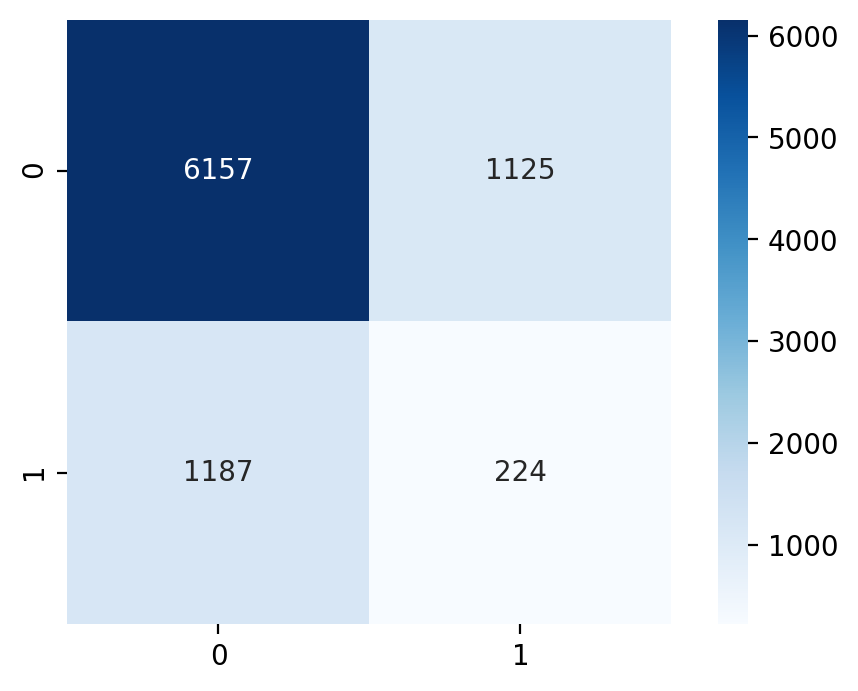

In [112]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")